![image.png](attachment:image.png)

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:

from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

# Indest Data

# Exploratory Data Analysis and Visualization

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [5]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [7]:
df.columns = ['Production']

In [8]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


<Axes: xlabel='DATE'>

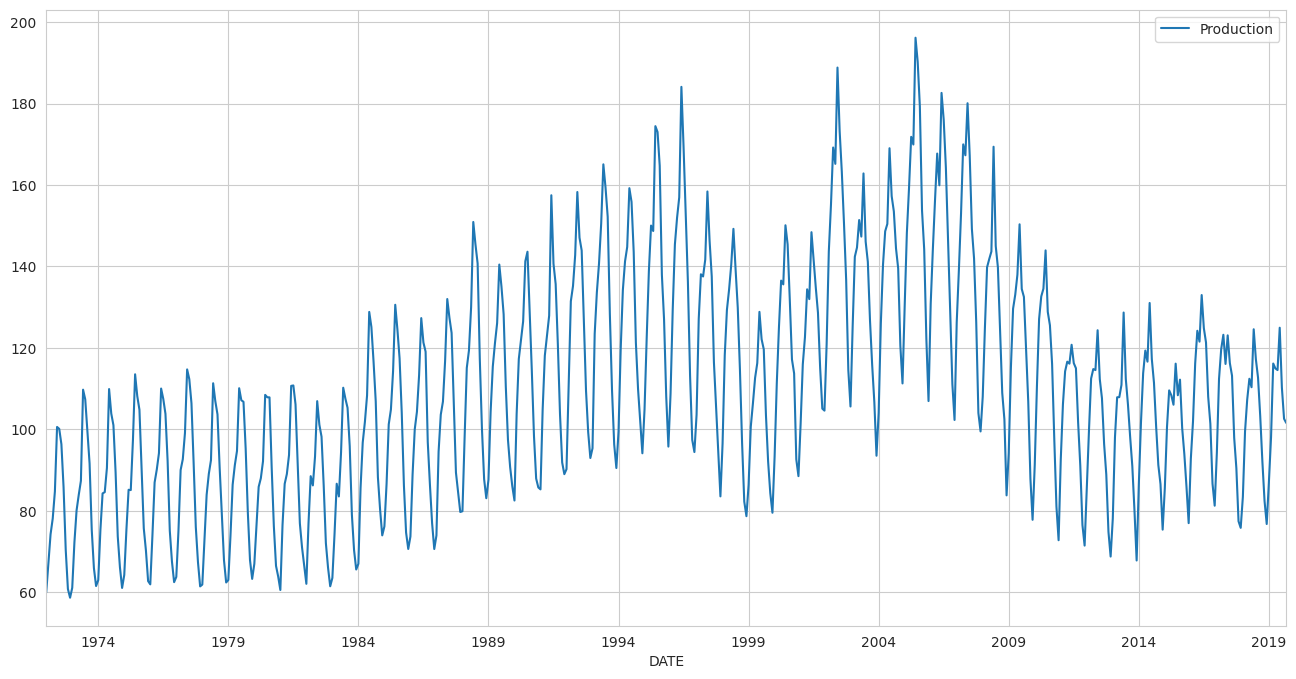

In [9]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [10]:
len(df)

573

In [11]:
test_size = 24

In [12]:
test_ind = len(df)- test_size

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
len(train)

549

In [15]:
len(test)

24

In [16]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [17]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


![image.png](attachment:image.png)

## Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

549-12=537

In [23]:
len(generator)

537

In [24]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [25]:
X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [28]:
train_scaled.shape

(549, 1)

In [29]:
n_features = train_scaled.shape[1]
n_features

1

## with "tanh" activation function

In [30]:
model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(LSTM(16, activation = 'tanh'))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

LSTM (Long Short-Term Memory) layer is a type of artificial neural network layer used in the analysis of sequential data structures such as time series or sequential data. One of the most important features of LSTM is that it can preserve past information in its hidden cells.

A LSTM layer is usually used to process sequential time steps. For example, when making a time series prediction, the LSTM layer takes the data from the current time step at each time step and uses the information from the previous time steps together with this data to make a prediction for the next time step.

If return_sequences=True, the LSTM layer produces a complete time series output from each time step. That is, an output vector is obtained at each time step and these outputs can be passed to the next LSTM layer or output layer sequentially. In this case, the LSTM layer is expected to produce an output for each time step and ultimately provide a complete time series output.

This feature can be used to analyze time series data more deeply and capture more complex relationships when used with multiple LSTM layers. It is also possible to make predictions by directly connecting these outputs to an output layer.

To summarize, setting return_sequences=True ensures that the LSTM layer produces a full time series output from each time step, so we can more effectively model relationships across consecutive time steps.

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

# EarlyStopping and Validation Generator

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

The restore_best_weights=True parameter restores the best performing model weights at the end of the EarlyStopping process.

EarlyStopping is a regression stopping method used to stop the training of the model. It automatically stops training when a certain metric (usually validation loss) does not improve for a certain period of time. This is a strategy used to prevent overfitting and increase the generalization of the model.

The restore_best_weights=True setting restores the best performing model weights at the end of the EarlyStopping process. That is, when EarlyStopping stops, the weights with the lowest validation loss are used to restore the original weights of the model.

This feature ensures that the weights of the best performing model are preserved despite the early stopping of the training process. In this way, later predictions or evaluations can be made using the weights at the point where the model gave the best results.

In general, using restore_best_weights=True is a recommended practice for best performance in models trained with EarlyStopping.

In [33]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [34]:
model.fit(generator,
            epochs = 20,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 0.0394 - val_loss: 0.0138
Epoch 2/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0233 - val_loss: 0.0032
Epoch 3/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0158 - val_loss: 0.0047
Epoch 4/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0112 - val_loss: 0.0020
Epoch 5/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0098 - val_loss: 0.0020
Epoch 6/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0089 - val_loss: 0.0040
Epoch 7/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 8/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0075 - val_loss: 0.0023
Epoch 9/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0066 - val_loss: 0.0029
Epoch 10/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0072 - val_loss: 0.0034


<Axes: >

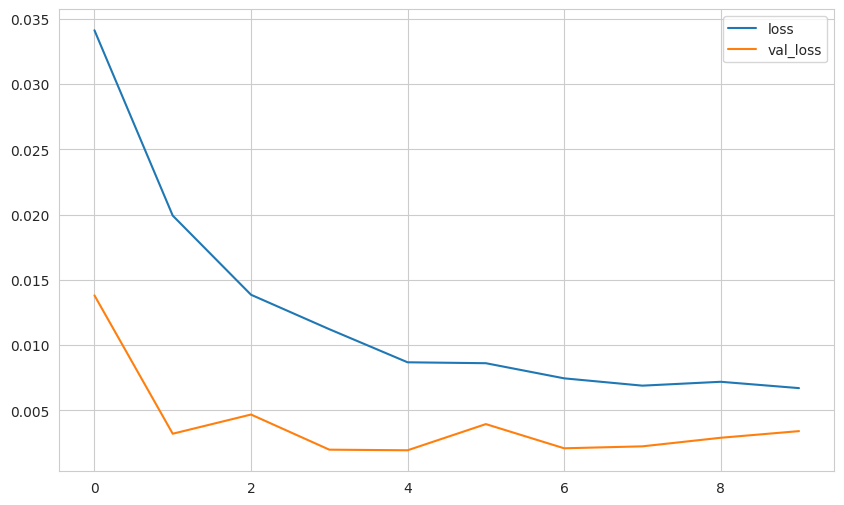

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [38]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):

    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)

    # store prediction
    predictions_scaled.append(current_pred[0])

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


This code block contains a loop that is used to make predictions after a model has completed training. The step-by-step explanation of what the code does is given below:

A blank list called predictions_scaled is defined. This list will be used to store the scaled prediction values.

The first_eval_batch is created using a slicing operation that includes the last length number of elements of the training dataset. This will be used to determine the starting point of the predictions. The last length row of the train_scaled dataset is taken as the first input that the model uses to start making predictions.

The current_batch variable is converted to a shape on the first_eval_batch. This represents the current input that will be used to make predictions. It will be updated at each step of this loop.

A loop is started and this loop continues for the length step.

The code block inside uses the model.predict() function on the current input to make predictions from the model. The prediction is made on the current_batch and is passed to the current_pred variable. This prediction is a scaled value.

The current_pred value is added to the predictions_scaled list. This way, the predictions made at each step are stored in this list.

current_batch is updated. The prediction value is added to current_batch and its initial value is removed. This way, the predictions are made sequentially and the new predictions are used as input.

This code block starts a prediction based on the model's last training data and makes new predictions sequentially. The predictions are stored in the predictions_scaled list and can be recycled later using their scaled versions. This way, the model's ability to make sequential predictions is demonstrated.

In [39]:
current_pred

array([[0.2824763]], dtype=float32)

In [40]:
current_batch

array([[[0.2518295 ],
        [0.18076594],
        [0.20632368],
        [0.30867219],
        [0.39888516],
        [0.4405885 ],
        [0.46569809],
        [0.47549456],
        [0.49468353],
        [0.45524943],
        [0.38998529],
        [0.28247631]]])

It looks like the current_batch and predictions_scaled lists initially contain the same value. This is because the first prediction was made on the model’s initial input, first_eval_batch. The first prediction is added to the predictions_scaled list after being passed to the current_pred variable.

The loop then continues to make predictions on current_batch and update the new prediction value to current_pred. However, when updating current_batch, the previous prediction value is added to the new current_batch, while the first value is discarded. Therefore, at each loop step, the previous prediction value is included in current_batch.

As a result, the current_batch and predictions_scaled lists initially contain the same value, but as the new prediction value current_pred is added to each loop step, the predictions_scaled list stores the prediction values.

This reflects the logic of making consecutive predictions. Each prediction is added to current_batch to be used as input for the next prediction. This allows the model to make consecutive predictions.

In [41]:
predictions_scaled

[array([0.2518295], dtype=float32),
 array([0.18076594], dtype=float32),
 array([0.20632368], dtype=float32),
 array([0.3086722], dtype=float32),
 array([0.39888516], dtype=float32),
 array([0.4405885], dtype=float32),
 array([0.4656981], dtype=float32),
 array([0.47549456], dtype=float32),
 array([0.49468353], dtype=float32),
 array([0.45524943], dtype=float32),
 array([0.3899853], dtype=float32),
 array([0.2824763], dtype=float32)]

In [42]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.06062691225215187 
mse: 0.005154443354365585 
rmse: 0.07179445211411245


### Inverse Transformation and Comparing

In [43]:
predictions = scaler.inverse_transform(predictions_scaled)

In [44]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,93.290
2017-11-01,77.438,83.518
2017-12-01,75.812,87.032
2018-01-01,83.434,101.107
2018-02-01,99.490,113.512
2018-03-01,107.315,119.247
2018-04-01,112.431,122.700
2018-05-01,110.354,124.047
2018-06-01,124.584,126.686


<Axes: xlabel='DATE'>

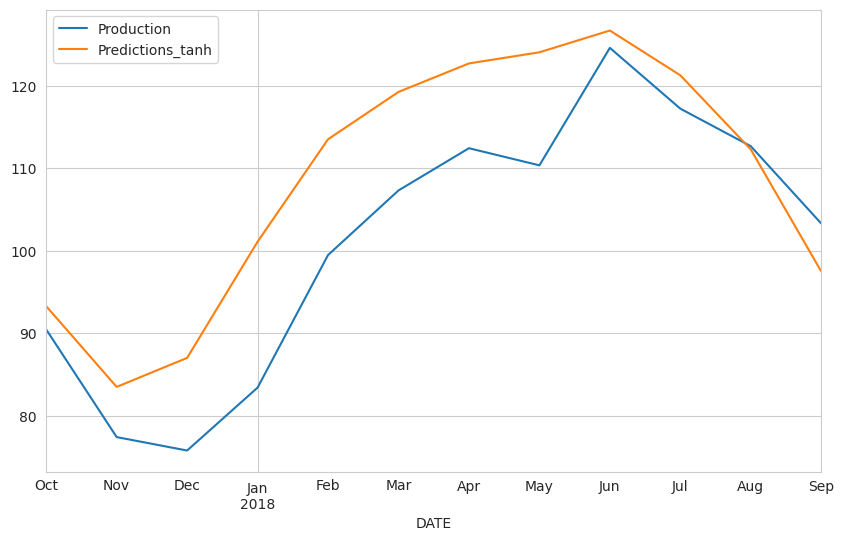

In [45]:
compare.plot()

In [46]:
eval_metrics(compare.Production, compare.Predictions_tanh)


mae: 8.337043148751178 
mse: 97.47089852408628 
rmse: 9.87273510857484


## with "relu" activation function

In [47]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 12, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 12, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [50]:
model.fit(generator,
            epochs = 20,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0473 - val_loss: 0.0029
Epoch 2/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0133 - val_loss: 0.0076
Epoch 3/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0098 - val_loss: 0.0029
Epoch 4/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0069 - val_loss: 0.0035
Epoch 5/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0070 - val_loss: 0.0022
Epoch 6/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0077 - val_loss: 0.0020
Epoch 7/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0072 - val_loss: 0.0041
Epoch 8/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 9/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 10/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0060 - val_loss: 0.0026
Epoch 11/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 12/20
537/537 ━━━━━━━━━━━━━━━━

<Axes: >

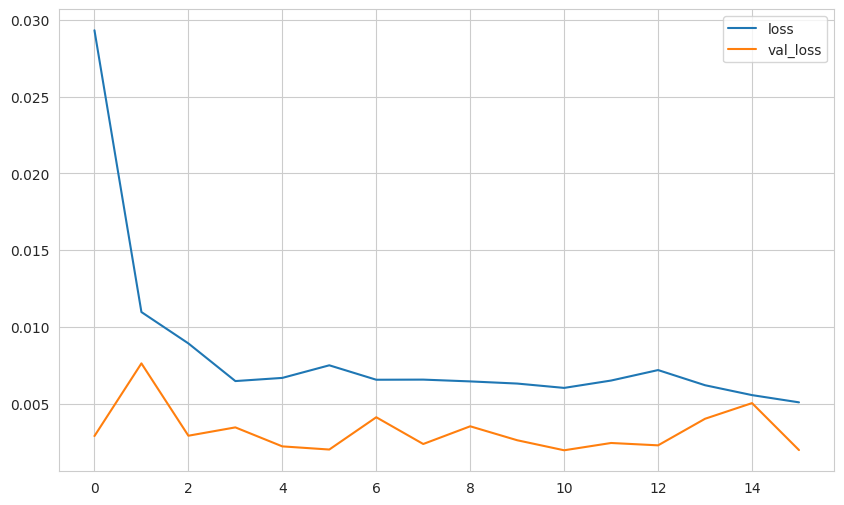

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [52]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):

    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)

    # store prediction
    predictions_scaled.append(current_pred[0])

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


### Inverse Transformation and Comparing

In [53]:
predictions = scaler.inverse_transform(predictions_scaled)

In [54]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,93.290,97.458
2017-11-01,77.438,83.518,82.687
2017-12-01,75.812,87.032,83.341
2018-01-01,83.434,101.107,99.354
2018-02-01,99.490,113.512,112.112
2018-03-01,107.315,119.247,117.451
2018-04-01,112.431,122.700,118.696
2018-05-01,110.354,124.047,120.516
2018-06-01,124.584,126.686,123.478


<Axes: xlabel='DATE'>

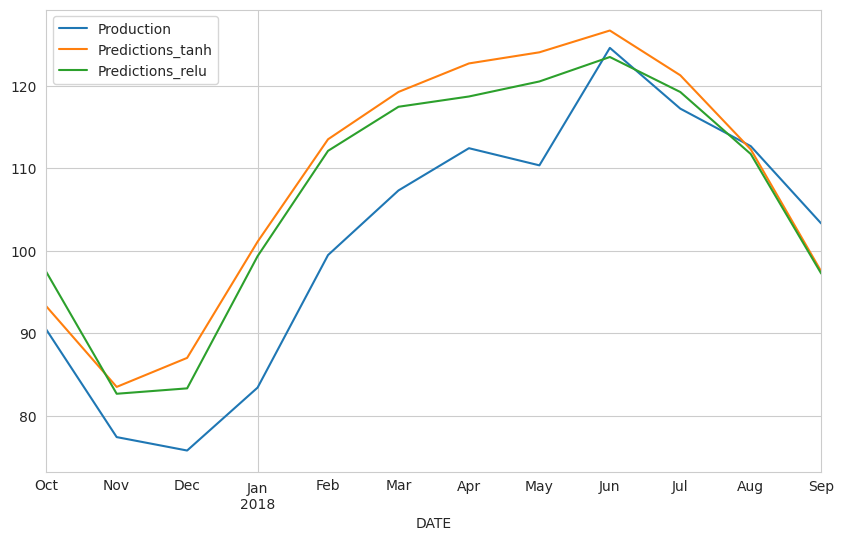

In [55]:
compare.plot()

In [56]:
eval_metrics(compare.Production, compare.Predictions_relu)


mae: 7.084004282695548 
mse: 69.49995560918391 
rmse: 8.336663337881884


# Retrain and Forecasting - Create Final Model with Full Data

In [57]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [58]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [59]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit(generator, epochs=20)

Epoch 1/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.0585
Epoch 2/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0125
Epoch 3/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0096
Epoch 4/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0067
Epoch 5/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0071
Epoch 6/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0059
Epoch 7/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0064
Epoch 8/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0062
Epoch 9/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0062
Epoch 10/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0071
Epoch 11/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0068
Epoch 12/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0060
Epoch 13/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0048
Epoch 14/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0066
Epoch 15/20
561/561 ━━━━━━━━━━━━━━━━━

In [60]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)

    # store prediction
    forecast.append(current_pred[0])

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [61]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 92.37735287],
       [ 83.36071852],
       [ 82.22033994],
       [ 91.73783991],
       [109.88346169],
       [123.18465172],
       [126.06977947],
       [132.57423762],
       [136.56260576],
       [118.4122792 ],
       [110.19930436],
       [105.61209414]])

In [62]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [63]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [64]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,92.377
2019-11-01,83.361
2019-12-01,82.220
2020-01-01,91.738
2020-02-01,109.883
2020-03-01,123.185
2020-04-01,126.070
2020-05-01,132.574
2020-06-01,136.563
2020-07-01,118.412


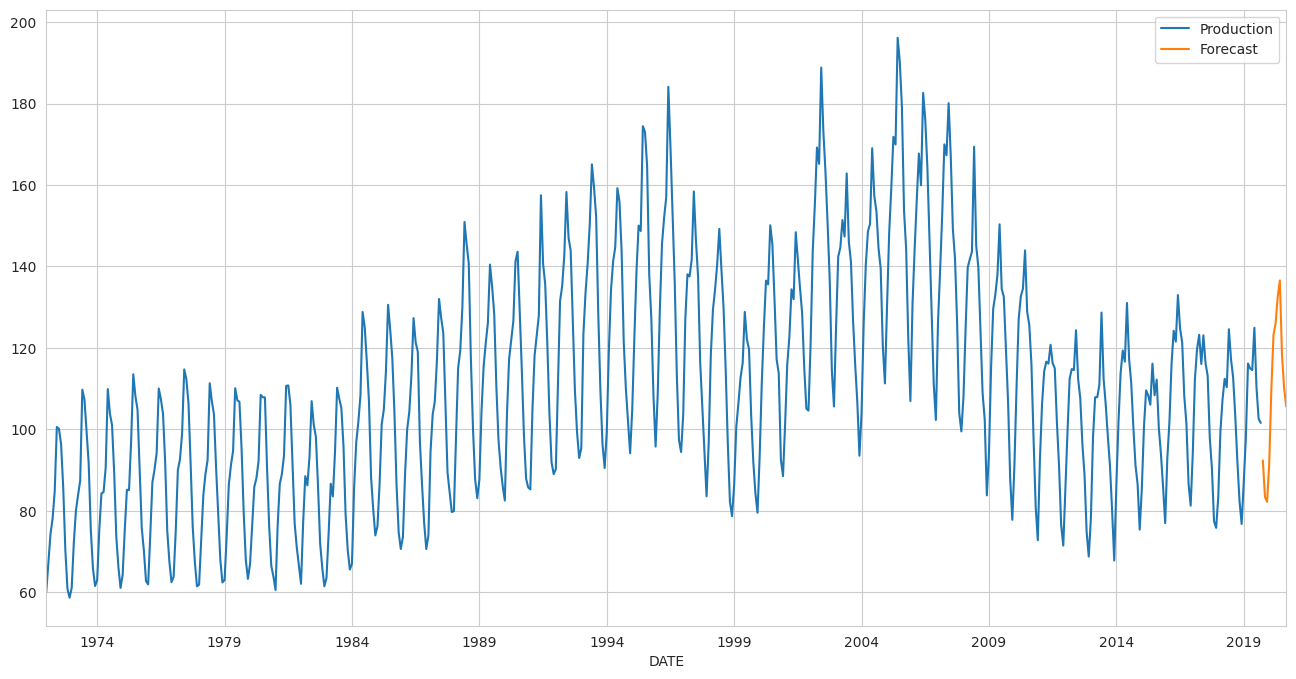

In [65]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

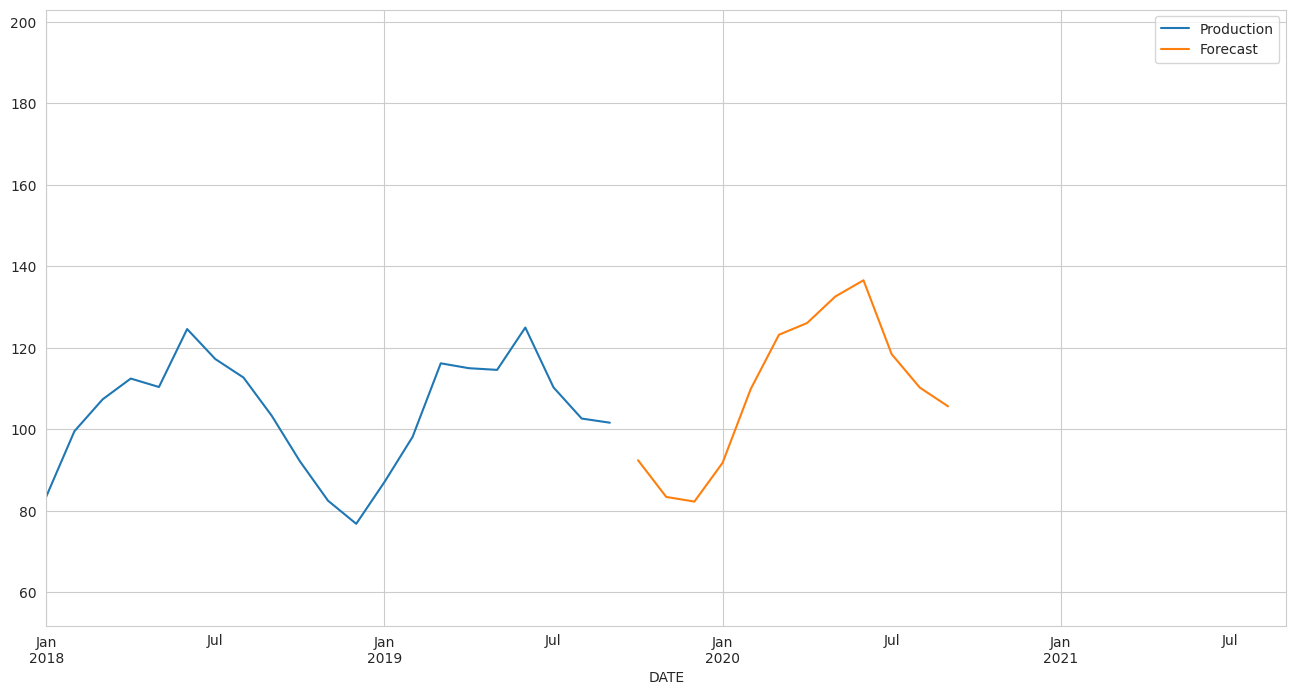

In [66]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

In [67]:
from keras.models import load_model

# Modeli kaydetme
model.save('final_model2.h5')